# Best Position, Agility, and Crossing ANOVA

Here, I will analyse the best position by agility and crossing respectively.

In [1]:
library("repr")
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
players = read.csv("project/fifa23_players_data.csv")
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [3]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

## Agility by Best Position

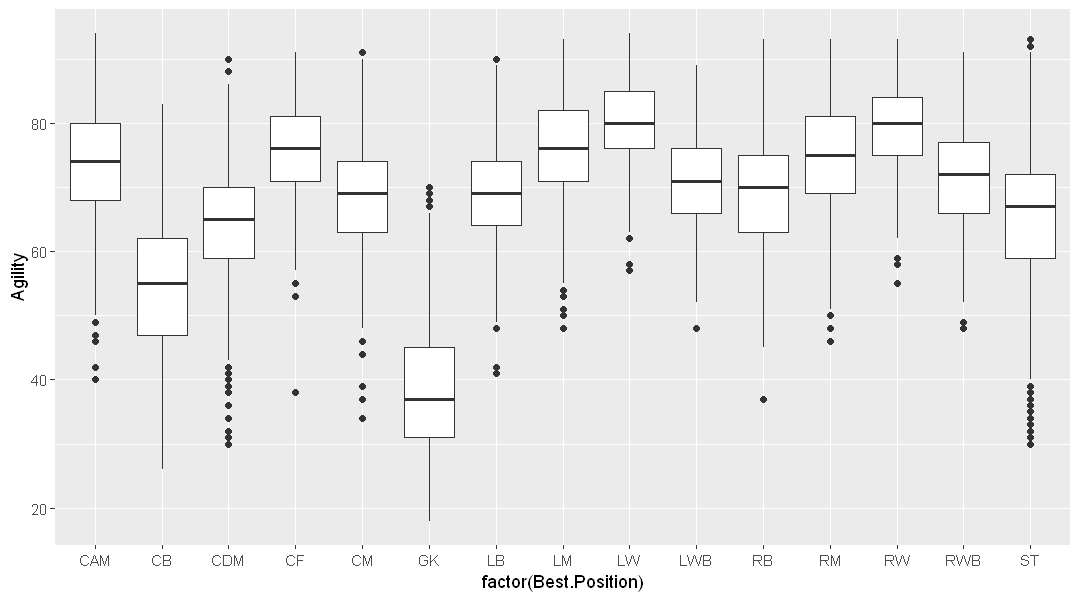

In [4]:
options(repr.plot.width=9, repr.plot.height=5)
df = players[,c('Best.Position', 'Agility')]
ggplot(df,  aes(x=factor(Best.Position), y=Agility)) + geom_boxplot() 

### Selected Best Positions

In [5]:
group <- c('LWB', 'RWB')
df1 = players[(players['Best.Position'] == 'LWB') |
              (players['Best.Position'] == 'RWB'),
              c('Best.Position', 'Agility')]
df1 = droplevels(df1) # To change to new levels
head(df1)

,Best.Position,Agility
87,LWB,78
137,RWB,75
206,LWB,71
238,RWB,69
243,LWB,69
272,LWB,80


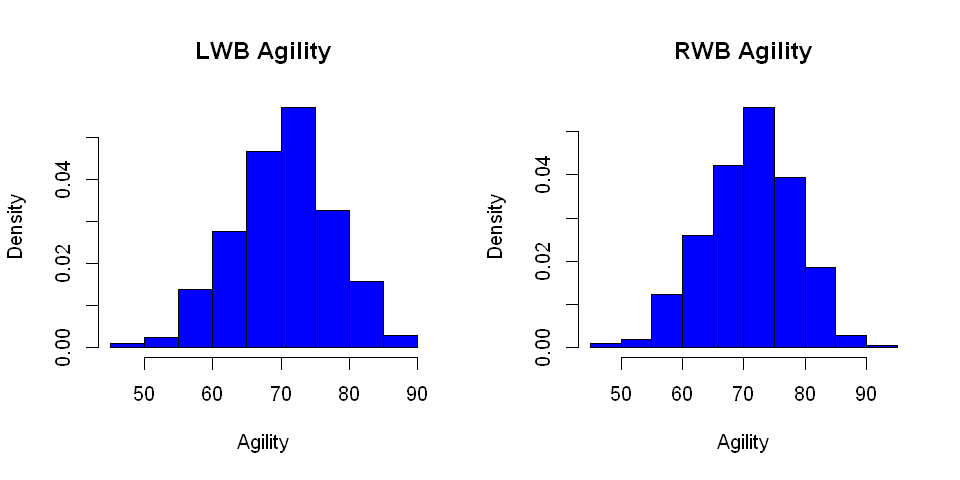

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
for (pos in group){
    hist(df1[df1['Best.Position'] == pos, 'Agility'],
        main=paste(pos, 'Agility'),
        col='blue',
        xlab='Agility',
        ylab='Density',
        freq=FALSE)
}

### Normality Assumption Check

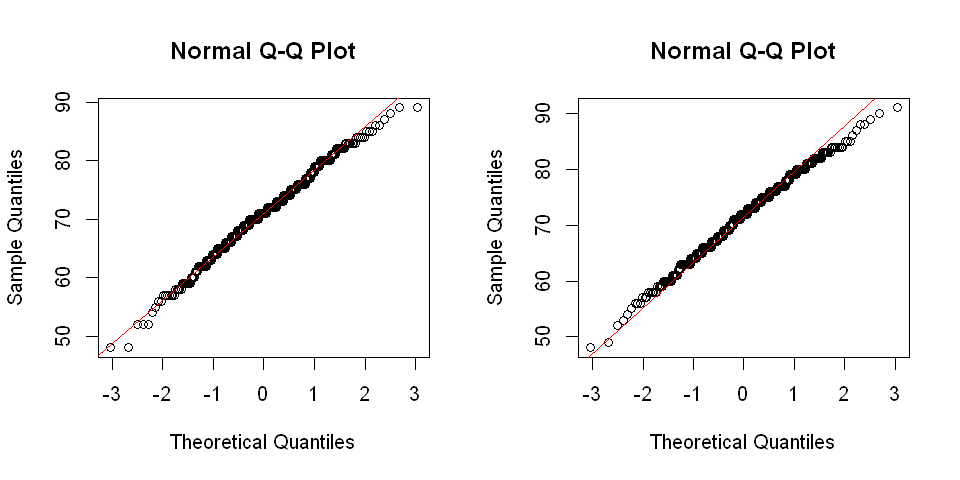

In [7]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
for (pos in group){
    qqnorm(df1[df1['Best.Position'] == pos, 'Agility'])
    qqline(df1[df1['Best.Position'] == pos, 'Agility'], col='red')
}

In [8]:
for (pos in group){
    print(pos)
    print(shapiro.test(df1[df1['Best.Position'] == pos, 'Agility'])[2])
}

[1] "LWB"
$p.value
[1] 0.07531318

[1] "RWB"
$p.value
[1] 0.1507862



The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line. Furthermore, the Shapiro-Wilk test also support the normality of the data at 5% significance level.

### Homogeneity of Variance Assumption Check

In [9]:
stdGrp = aggregate(df1$Agility, by=list(df1$Best.Position), FUN=sd)
colnames(stdGrp) = c('Best.Position', 'Std')
stdGrp

Best.Position,Std
LWB,7.264592
RWB,7.357955


In [10]:
max(stdGrp$Std) / min(stdGrp$Std)

[1] 1.012852

That is less than the threshold of 2. Thus, we conclude that the assumptions are fulfilled.

### ANOVA Test

In [11]:
n = nrow(df1); k = length(group)
Sw2 = 0; Sb2 = 0
Xbar = mean(df1$Agility)
for (pos in group){
    Xi = df1[df1['Best.Position'] == pos, 'Agility']
    Sw2 = Sw2 + sum((Xi - mean(Xi))^2)
    Sb2 = Sb2 + length(Xi)*((mean(Xi) - Xbar)^2)
}
Sw2 = Sw2/(n-k)
Sb2 = Sb2/(k-1)
F = Sb2/Sw2
Sw2;Sb2;F

[1] 53.47181

[1] 84.98241

[1] 1.589294

In [12]:
# sum of squares
Sb2*(k-1)
# residuals
Sw2*(n-k)

[1] 84.98241

[1] 44060.77

In [13]:
1-pf(F, df1=k-1, df2=n-k)

[1] 0.2077839

At 5% significance level, there is sufficient evidence to reject the null hypothesis that their means are equal.

In [14]:
aov(df1$Agility ~ factor(df1$Best.Position))

Call:
   aov(formula = df1$Agility ~ factor(df1$Best.Position))

Terms:
                factor(df1$Best.Position) Residuals
Sum of Squares                      84.98  44060.77
Deg. of Freedom                         1       824

Residual standard error: 7.312442
Estimated effects may be unbalanced

In [15]:
summary(aov(df1$Agility ~ factor(df1$Best.Position)))

                           Df Sum Sq Mean Sq F value Pr(>F)
factor(df1$Best.Position)   1     85   84.98   1.589  0.208
Residuals                 824  44061   53.47               

### Pairwise comparisons

In [16]:
# pairwise.t.test(df1$Agility, df1$Best.Position, p.adjust.method = 'none')

# F-test and T-test

In [17]:
var.test(df1$Agility ~ factor(df1$Best.Position))


	F test to compare two variances

data:  df1$Agility by factor(df1$Best.Position)
F = 0.97478, num df = 403, denom df = 421, p-value = 0.7962
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8035083 1.1830572
sample estimates:
ratio of variances 
         0.9747834 


As the p-value is greater than 5% significance level, both variances are equal.

In [18]:
t.test(df1$Agility ~ factor(df1$Best.Position), var.equal=TRUE)


	Two Sample t-test

data:  df1$Agility by factor(df1$Best.Position)
t = -1.2607, df = 824, p-value = 0.2078
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6407250  0.3573971
sample estimates:
mean in group LWB mean in group RWB 
         70.90099          71.54265 


As the p-value is greater than 5% significance level, both of them have equal mean.

## Crossing By Best Position

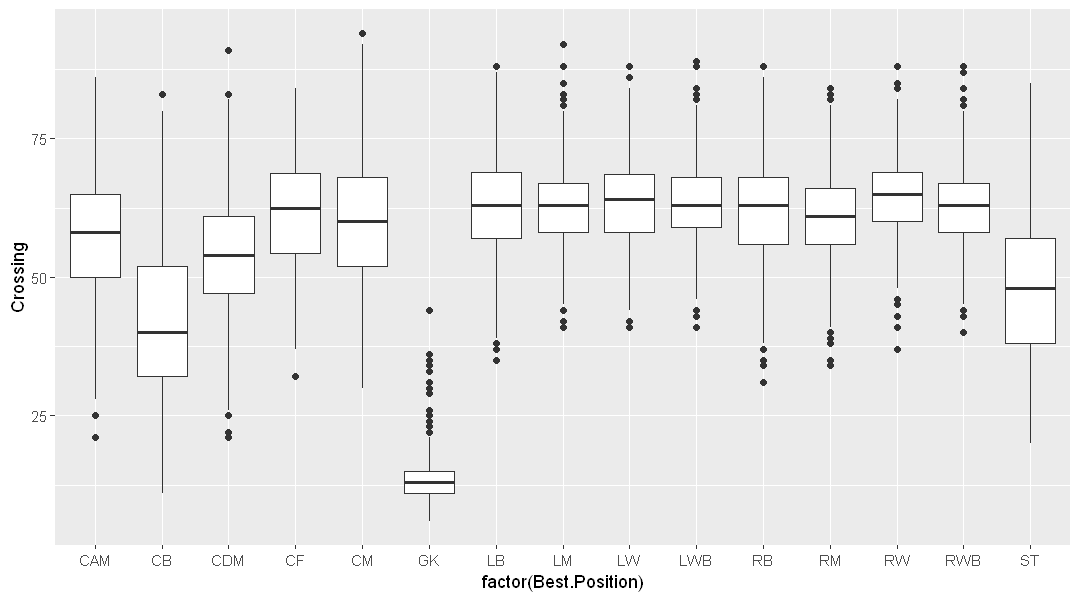

In [19]:
options(repr.plot.width=9, repr.plot.height=5)
df = players[,c('Best.Position', 'Crossing')]
ggplot(df,  aes(x=factor(Best.Position), y=Crossing)) + geom_boxplot() 

### Selected Positions

In [20]:
group <- c('CF', 'LB', 'LW', 'RW')
df2 = players[(players['Best.Position'] == 'CF') |
              (players['Best.Position'] == 'LB') |
              (players['Best.Position'] == 'LW') |
              (players['Best.Position'] == 'RW'),
              c('Best.Position', 'Crossing')]
df2 = droplevels(df2) # To change to new levels
head(df2)

,Best.Position,Crossing
2,CF,75
6,RW,80
12,LW,84
13,LW,83
25,LB,88
40,LB,88


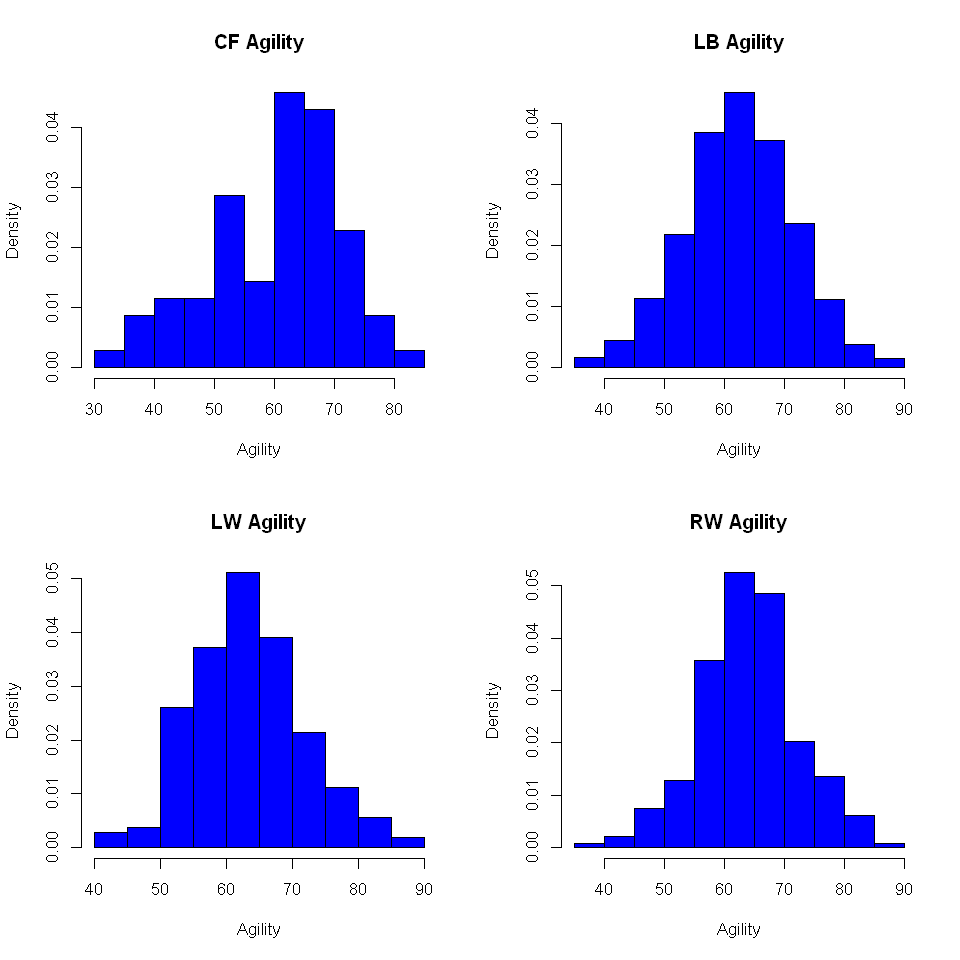

In [21]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (pos in group){
    hist(df2[df2['Best.Position'] == pos, 'Crossing'],
        main=paste(pos, 'Agility'),
        col='blue',
        xlab='Agility',
        ylab='Density',
        freq=FALSE)
}

### Normality Assumption Check

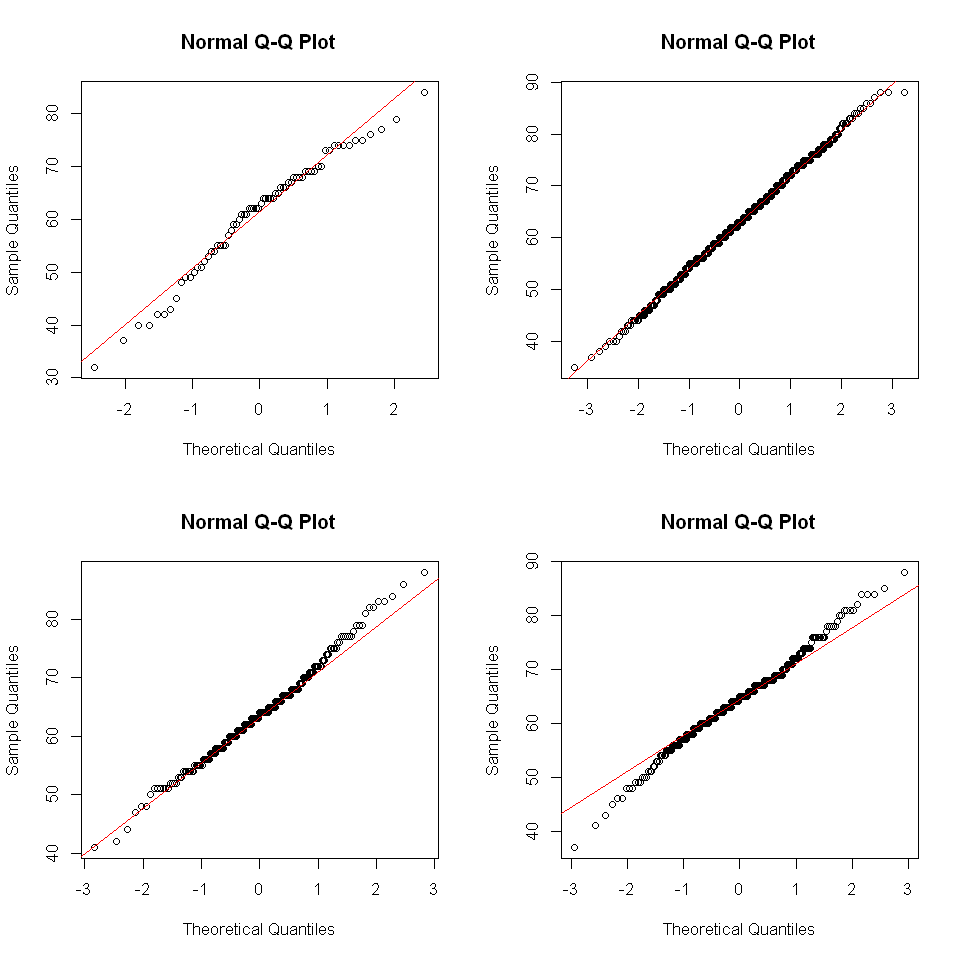

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (pos in group){
    qqnorm(df2[df2['Best.Position'] == pos, 'Crossing'])
    qqline(df2[df2['Best.Position'] == pos, 'Crossing'], col='red')
}

In [23]:
for (pos in group){
    print(pos)
    print(shapiro.test(df2[df2['Best.Position'] == pos, 'Crossing'])[2])
}

[1] "CF"
$p.value
[1] 0.1263576

[1] "LB"
$p.value
[1] 0.3184518

[1] "LW"
$p.value
[1] 0.3752845

[1] "RW"
$p.value
[1] 0.1351992



The Q-Q plot shows a largely straight-line pattern if it is from a normal distribution. From the above figure, we may assume that the data for each group falls roughly on a straight line. Furthermore, the Shapiro-Wilk test also support the normality of the data at 5% significance level.

### Homogeneity of Variance Assumption Check

In [24]:
stdGrp = aggregate(df2$Crossing, by=list(df2$Best.Position), FUN=sd)
colnames(stdGrp) = c('Best.Position', 'Std')
stdGrp

Best.Position,Std
CF,10.991329
LB,9.008557
LW,8.393359
RW,8.083652


In [25]:
max(stdGrp$Std) / min(stdGrp$Std)

[1] 1.359698

That is less than the threshold of 2. Thus, we conclude that the assumptions are fulfilled.

### ANOVA Test

In [26]:
n = nrow(df2); k = length(group)
Sw2 = 0; Sb2 = 0
Xbar = mean(df2$Crossing)
for (pos in group){
    Xi = df2[df2['Best.Position'] == pos, 'Crossing']
    Sw2 = Sw2 + sum((Xi - mean(Xi))^2)
    Sb2 = Sb2 + length(Xi)*((mean(Xi) - Xbar)^2)
}
Sw2 = Sw2/(n-k)
Sb2 = Sb2/(k-1)
F = Sb2/Sw2
Sw2;Sb2;F

[1] 78.21779

[1] 298.846

[1] 3.820691

In [27]:
# sum of squares
Sb2*(k-1)
# residuals
Sw2*(n-k)

[1] 896.538

[1] 112790.1

In [28]:
1-pf(F, df1=k-1, df2=n-k)

[1] 0.009655453

In [29]:
aov(df2$Crossing ~ factor(df2$Best.Position))

Call:
   aov(formula = df2$Crossing ~ factor(df2$Best.Position))

Terms:
                factor(df2$Best.Position) Residuals
Sum of Squares                     896.54 112790.06
Deg. of Freedom                         3      1442

Residual standard error: 8.844082
Estimated effects may be unbalanced

In [30]:
summary(aov(df2$Crossing ~ factor(df2$Best.Position)))

                            Df Sum Sq Mean Sq F value  Pr(>F)   
factor(df2$Best.Position)    3    897  298.85   3.821 0.00966 **
Residuals                 1442 112790   78.22                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
pairwise.t.test(df2$Crossing, df2$Best.Position, p.adjust.method = 'none')


	Pairwise comparisons using t tests with pooled SD 

data:  df2$Crossing and df2$Best.Position 

   CF     LB     LW    
LB 0.0892 -      -     
LW 0.0265 0.2157 -     
RW 0.0042 0.0116 0.3983

P value adjustment method: none 